In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

# 2 categories: 0 = Economy, 1 = Luxury
category = np.random.choice([0, 1], size=n, p=[0.6, 0.4])
df = pd.DataFrame({"category": category})

# Price in USD with overlap
df["price_usd"] = np.where(
    df["category"] == 0,
    np.random.randint(15000, 40000, n), # Economy
    np.random.randint(35000, 120000, n) # Luxury
)

# Engine Horsepower (HP)
df["horsepower"] = np.where(
    df["category"] == 0,
    np.random.randint(100, 250, n),
    np.random.randint(240, 600, n)
)

# Fuel Efficiency (MPG) - Economy usually higher
df["mpg"] = np.where(
    df["category"] == 0,
    np.random.randint(25, 45, n),
    np.random.randint(12, 28, n)
)

# Safety Rating (1.0 to 5.0)
df["safety_rating"] = np.where(
    df["category"] == 0,
    np.round(np.random.normal(loc=3.8, scale=0.5, size=n), 1),
    np.round(np.random.normal(loc=4.5, scale=0.3, size=n), 1)
).clip(1.0, 5.0)

# Tech Score (0-100) based on features like screens, sensors
df["tech_score"] = np.where(
    df["category"] == 0,
    np.random.randint(20, 70, n),
    np.random.randint(60, 100, n)
)

# Save the synthetic dataset
df.to_csv("cars_synthetic_1000.csv", index=False)
print(df.head())

   category  price_usd  horsepower  mpg  safety_rating  tech_score
0         0      39366         206   37            3.8          41
1         1      91154         553   21            4.3          81
2         1      55609         544   27            4.5          83
3         0      26855         105   44            4.1          60
4         0      39791         158   44            2.8          54


Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       1.00      0.99      0.99        77

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



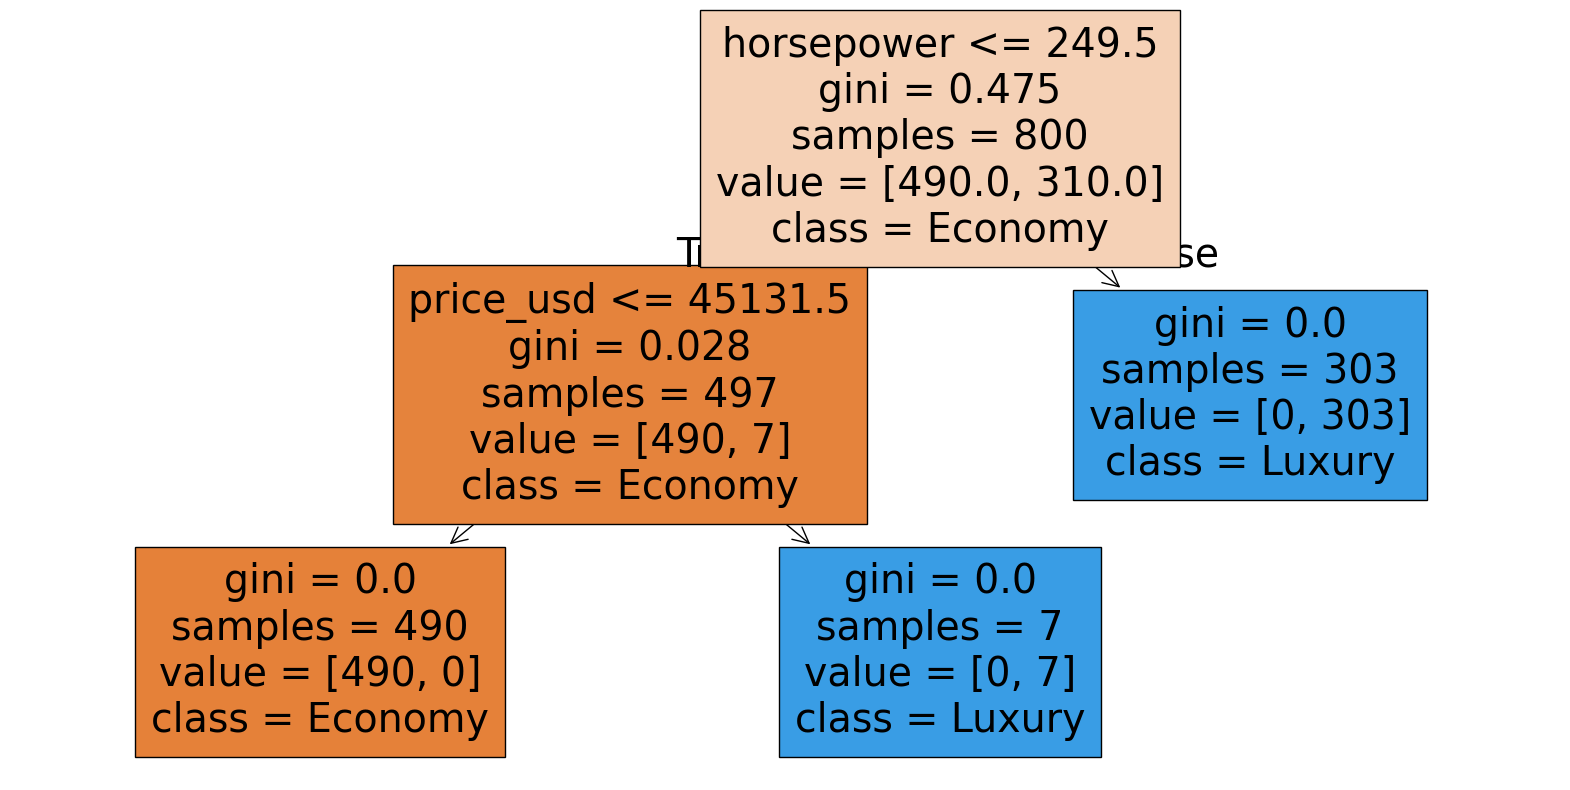

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("cars_synthetic_1000.csv")
X = df.drop("category", axis=1)
y = df["category"]

# Step 2: Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Initialize and train the model
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    min_samples_split=10,
    random_state=42
)
dt_model.fit(X_train, y_train)

# Step 4: Perform Predictions
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Economy", "Luxury"], filled=True)
plt.show()

In [ ]:
import gradio as gr
import pandas as pd

In [ ]:
# Define the prediction function
def predict_car_category(price, hp, fuel_eff, safety, tech):
    # Create a DataFrame for the input to match the training data format
    input_data = pd.DataFrame([[price, hp, fuel_eff, safety, tech]],
                              columns=['price_usd', 'horsepower', 'mpg', 'safety_rating', 'tech_score'])

    # Get prediction from the trained model
    prediction = dt_model.predict(input_data)

    # Return human-readable label
    return "Luxury Car" if prediction[0] == 1 else "Economy Car"

# Set up the Gradio Interface
interface = gr.Interface(
    fn=predict_car_category,
    inputs=[
        gr.Slider(10000, 150000, step=1000, label="Price (USD)"),
        gr.Slider(50, 700, step=10, label="Horsepower (HP)"),
        gr.Slider(10, 60, step=1, label="Fuel Efficiency (MPG)"),
        gr.Slider(1.0, 5.0, step=0.1, label="Safety Rating (1-5)"),
        gr.Slider(0, 100, step=5, label="Tech Score (0-100)")
    ],
    outputs=gr.Textbox(label="Model Prediction"),
    title="Car Category Classifier",
    description="Enter the car details below to see if the AI classifies it as an Economy or Luxury vehicle."
)

# Launch the dashboard
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5d25d7010af09075e9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5d25d7010af09075e9.gradio.live
